In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import pickle

# 1- Full Data Evaluations

In [2]:
load_model = False # if true, it loads a trained model instead of training a new one
models_folder = 'models\\'
X = np.genfromtxt('processed_data\\X_scaled_pca100.csv', delimiter=',')
y = np.genfromtxt('processed_data\\y.csv', delimiter=',')
mask_train = np.genfromtxt('processed_data\\mask_train.csv', delimiter=',', dtype=bool)

In [3]:
X_train = X[mask_train, :]
X_test = X[~mask_train, :]

y_train = y[mask_train]
y_test = y[~mask_train]

1.1- Training or Loading Model

In [4]:
if load_model:
    with open(models_folder+'clf_cs_pca100.pkl', 'rb') as file:
        clf_cs_pca100 = pickle.load(file)
    print('Full Model Loaded')
else:
    print('Training Linear SVM on Full Data...')
    clf_cs_pca100 = LinearSVC(multi_class='crammer_singer', max_iter=100000)
    clf_cs_pca100 = clf_cs_pca100.fit(X_train, y_train)
    with open(models_folder+'clf_cs_pca100.pkl', 'wb') as file:
        pickle.dump(clf_cs_pca100, file)
    print(f'Model Trained on Full Data and stored at\n\t{models_folder+"clf_cs_pca100.pkl"}')    

Training Linear SVM on Full Data...
Model Trained on Full Data and stored at
	models\clf_cs_pca100.pkl


c:\Program Files\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [13]:
p_train = clf_cs_pca100.predict(X_train)
p_test = clf_cs_pca100.predict(X_test)
clf_cs_pca100.n_iter_

1868788851

1.2- Metrics for Train Data on Full Model

-- Linear SVM Classifier --
Train Accuracy: 92.56%
Confusion Matrix (Train):
[[5750    1   21   11   13   38   36   10   38    5]
 [   2 6567   31   24    7   27    2   15   54   13]
 [  38   38 5378   80   73   40   77   78  132   24]
 [  24   16  147 5472    5  212   18   59  115   63]
 [  18   28   32    8 5446    4   58   19   38  191]
 [  72   23   58  167   66 4717   93   21  159   45]
 [  38   12   37    1   36   71 5696    1   22    4]
 [  14   17   82   21   59   16    3 5869   19  165]
 [  28  100   69  125   28  137   42   18 5247   57]
 [  32   26   18   76  155   36    2  151   62 5391]]


Normalized Confusion Matrix (Train):
[[97.  0.  0.  0.  0.  1.  1.  0.  1.  0.]
 [ 0. 97.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 1.  1. 90.  1.  1.  1.  1.  1.  2.  0.]
 [ 0.  0.  2. 89.  0.  3.  0.  1.  2.  1.]
 [ 0.  0.  1.  0. 93.  0.  1.  0.  1.  3.]
 [ 1.  0.  1.  3.  1. 87.  2.  0.  3.  1.]
 [ 1.  0.  1.  0.  1.  1. 96.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0. 94.  0.  3.]
 [ 0.  2.  1.  2.  0.  2.  1.  0. 90.  1.]
 [ 1.  0.  0.  1.  3.  1.  0.  3.  1. 91.]]


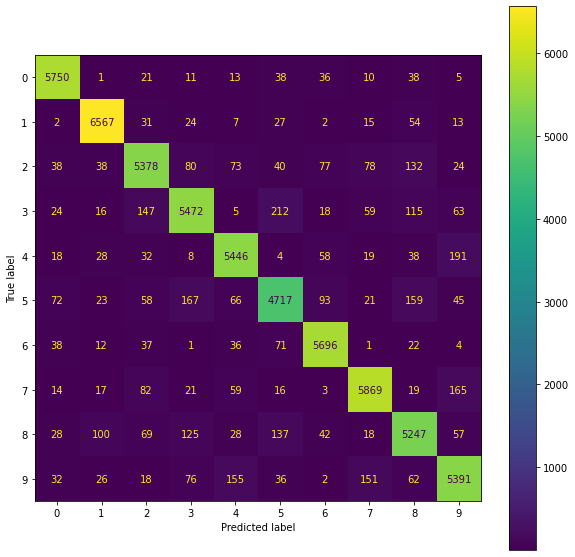

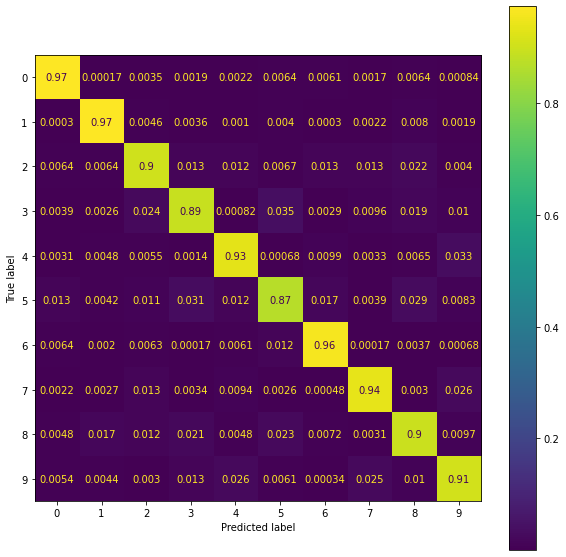

In [6]:
print('-- Linear SVM Classifier --')
print(f'Train Accuracy: {round(clf_cs_pca100.score(X_train, y_train)*100, 2)}%')

cm = confusion_matrix(y_train, p_train)
print(f'Confusion Matrix (Train):\n{cm}')
fig, ax = plt.subplots(figsize=(10,10))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(ax=ax)

cmn = confusion_matrix(y_train, p_train, normalize='true')
print(f'Normalized Confusion Matrix (Train):\n{np.round(cmn*100)}')
fig, ax = plt.subplots(figsize=(10,10))
cmnd = ConfusionMatrixDisplay(cmn)
cmnd.plot(ax=ax)

In [7]:
tp_fp_classes = np.sum(cm, axis=0)
tp_fn_classes = np.sum(cm, axis=1)
list_precisions = []
list_recalls = []
for i in range(cm.shape[0]):
    tp_fp = tp_fp_classes[i]
    tp_fn = tp_fn_classes[i]
    tp = cm[i,i]
    precision = tp / tp_fp
    recall = tp / tp_fn
    list_precisions.append(precision)
    list_recalls.append(recall)
    # print(f'* Class {i} *')
    # print(f'Precision: {precision}')
    # print(f'Recall: {recall}')
    
PR = pd.DataFrame(index=['Precision (Train)', 'Recall (Train)'], columns=range(10))
PR.iloc[0] = list_precisions
PR.iloc[1] = list_recalls
PR

,0,1,2,3,4,5,6,7,8,9
Precision (Train),0.955785,0.961775,0.915716,0.914286,0.924932,0.890336,0.94508,0.940394,0.891437,0.904834
Recall (Train),0.970792,0.974043,0.902652,0.892513,0.932215,0.870135,0.962487,0.936792,0.89677,0.906203


-- Linear SVM Classifier --
Test Accuracy: 92.6%
Confusion Matrix (Test):
[[ 961    0    2    2    1    2    9    2    1    0]
 [   0 1116    2    3    0    1    4    2    7    0]
 [   7    7  931   12    7    6   13   13   31    5]
 [   4    0   21  916    0   23    2   11   22   11]
 [   2    2    7    0  910    0    9    2   10   40]
 [   9    2    5   36   11  772   14    8   29    6]
 [  16    3    7    1    5   10  912    2    2    0]
 [   2    7   25    5    6    3    1  950    2   27]
 [   6    6    6   20    9   32   12    8  871    4]
 [  12    7    1    9   29    7    0   17    6  921]]


Normalized Confusion Matrix (Test):
[[98.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0. 98.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 1.  1. 90.  1.  1.  1.  1.  1.  3.  0.]
 [ 0.  0.  2. 91.  0.  2.  0.  1.  2.  1.]
 [ 0.  0.  1.  0. 93.  0.  1.  0.  1.  4.]
 [ 1.  0.  1.  4.  1. 87.  2.  1.  3.  1.]
 [ 2.  0.  1.  0.  1.  1. 95.  0.  0.  0.]
 [ 0.  1.  2.  0.  1.  0.  0. 92.  0.  3.]
 [ 1.  1.  1.  2.  1.  3.  1.  1. 89.  0.]
 [ 1.  1.  0.  1.  3.  1.  0.  2.  1. 91.]]


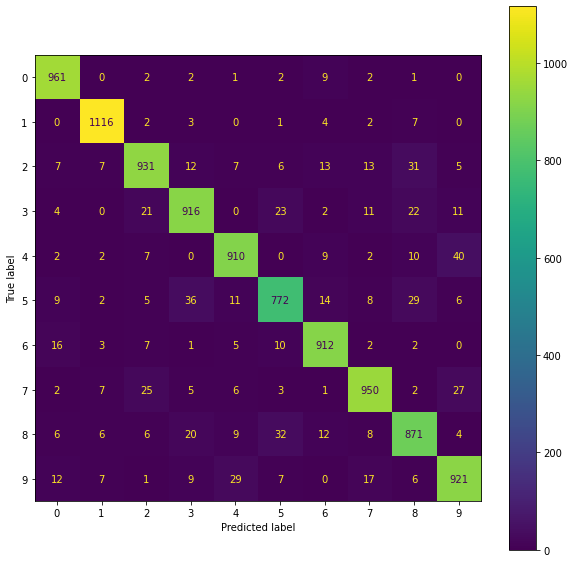

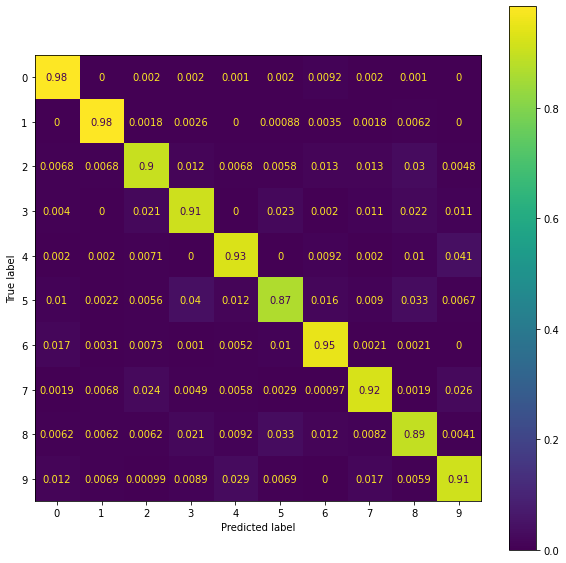

In [8]:
print('-- Linear SVM Classifier --')
print(f'Test Accuracy: {round(clf_cs_pca100.score(X_test, y_test)*100, 2)}%')

cm = confusion_matrix(y_test, p_test)
print(f'Confusion Matrix (Test):\n{cm}')
fig, ax = plt.subplots(figsize=(10,10))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(ax=ax)

cmn = confusion_matrix(y_test, p_test, normalize='true')
print(f'Normalized Confusion Matrix (Test):\n{np.round(cmn*100)}')
fig, ax = plt.subplots(figsize=(10,10))
cmnd = ConfusionMatrixDisplay(cmn)
cmnd.plot(ax=ax)

In [9]:
tp_fp_classes = np.sum(cm, axis=0)
tp_fn_classes = np.sum(cm, axis=1)
list_precisions = []
list_recalls = []
for i in range(cm.shape[0]):
    tp_fp = tp_fp_classes[i]
    tp_fn = tp_fn_classes[i]
    tp = cm[i,i]
    precision = tp / tp_fp
    recall = tp / tp_fn
    list_precisions.append(precision)
    list_recalls.append(recall)
    # print(f'* Class {i} *')
    # print(f'Precision: {precision}')
    # print(f'Recall: {recall}')
    
PR = pd.DataFrame(index=['Precision (Test)', 'Recall (Test)'], columns=range(10))
PR.iloc[0] = list_precisions
PR.iloc[1] = list_recalls
PR

,0,1,2,3,4,5,6,7,8,9
Precision (Test),0.943081,0.970435,0.924528,0.912351,0.93047,0.901869,0.934426,0.935961,0.88787,0.908284
Recall (Test),0.980612,0.98326,0.902132,0.906931,0.92668,0.865471,0.951983,0.924125,0.894251,0.912785


In [10]:
s_train = clf_cs_pca100.decision_function(X_train)
s_test = clf_cs_pca100.decision_function(X_test)
y_train_b = label_binarize(y_train, classes=range(10))
y_test_b = label_binarize(y_test, classes=range(10))

ROC (Train)


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Class 0')

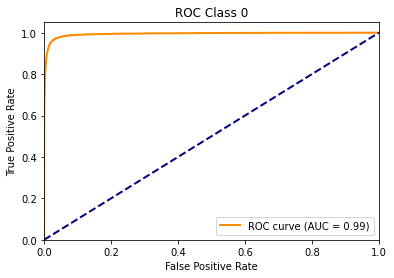

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Class 1')

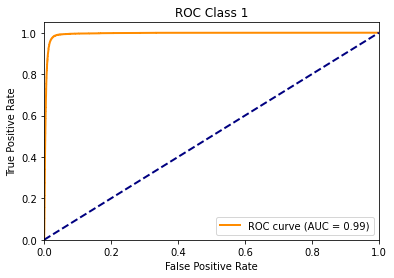

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Class 2')

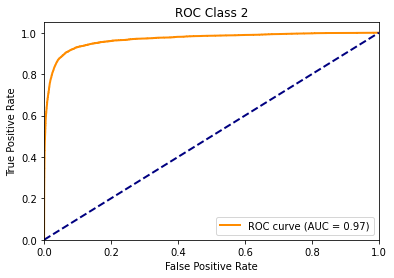

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Class 3')

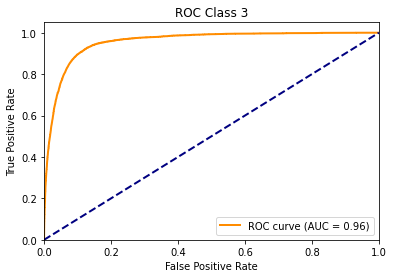

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Class 4')

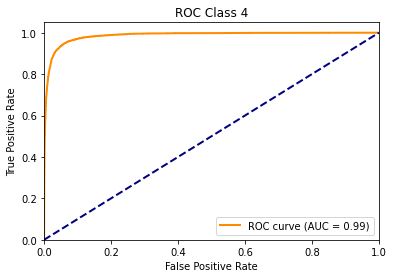

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Class 5')

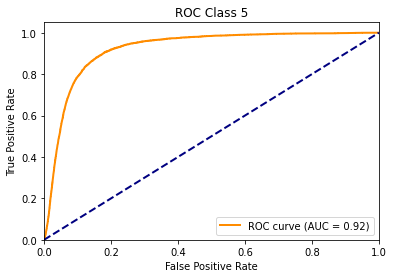

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Class 6')

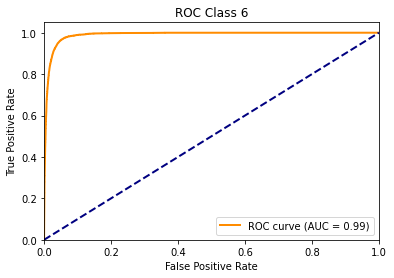

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Class 7')

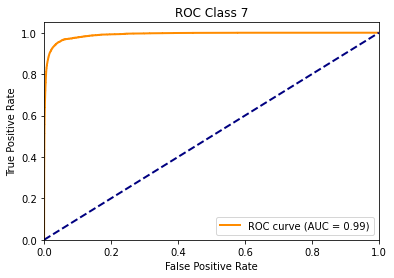

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Class 8')

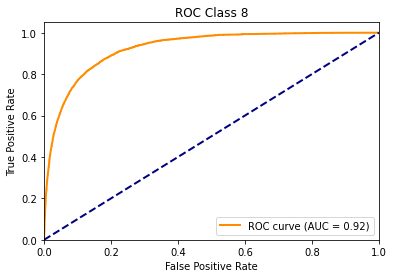

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Class 9')

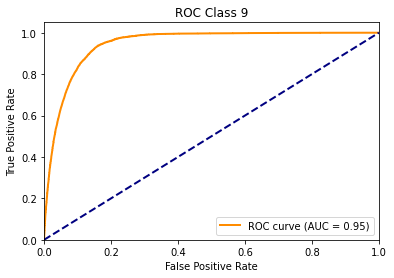

In [11]:
print('ROC (Train)')
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_train_b[:, i], s_train[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


for i in range(10):
    plt.figure()
    lw = 2
    plt.plot(
        fpr[i],
        tpr[i],
        color="darkorange",
        lw=lw,
        label="ROC curve (AUC = %0.2f)" % roc_auc[i],
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Class {i}")
    plt.legend(loc="lower right")
    plt.show()